##                                                  By Jhon Hinds                                   

# __UNSUPERVISED LEARNING APPROACHES FOR SEGMENTATION WITH K-MEANS & DBSCAN__     

A retail store aims to enhance customer engagement and optimize inventory management. Analysis of purchasing behavior through loyalty program data indicated a need for more granular customer segmentation. This insight led to the initiation of a segmentation project using unsupervised learning approaches to uncover detailed customer patterns.

    

## __Table of Contents__

<ol>
    <li><a href="#PROJECT-GOAL" style="color:blue;">PROJECT GOAL</a></li>
    <li>
        <a href="#LIBRARIES" style="color:blue;">LIBRARIES</a>
    </li>   
    <li><a href="#EXPLORATORY-DATA-ANALYSIS" style="color:blue;">EXPLORATORY DATA ANALYSIS</a></li>
    <li>
        <a href="Hierarchical-Clustering" style="color:blue;">Hierarchical Clustering</a>
         <ol>
            <li><a href="#Dendrogram-Approach" style="color:blue;">Dendrogram Approach</a></li>
         </ol>
    </li>  
    <li>
        <a href="#FLAT-CLUSTERING-APPROACHES-(K-MEANS)" style="color:blue;">FLAT CLUSTERING APPROACHES (K MEANS)</a>
         <ol>
            <li><a href="#K-Means-Clustering-Approach-#1" style="color:blue;">K Means Clustering Approach #1</a></li>
            <li><a href="#Results-for-K-Means-Approach-#1" style="color:blue;">Results for K Means Approach #1</a></li>
            <li><a href="#Visualizing-Clusters-from-K-Means-Model-Aproach-#1" style="color:blue;">Visualizing Clusters from K Means Model Aproach #1</a></li> 
            <li><a href="#K-Means-Clustering-Approach-#2" style="color:blue;">K Means Clustering Approach #2</a></li>
            <li><a href="#PCA-Results" style="color:blue;">PCA Results</a></li>
            <li><a href="#Fitting-K-Means-Clustering-Tuned-with-PCA" style="color:blue;">Fitting K Means Clustering Tuned with PCA</a></li>
            <li><a href="#Insights-for-K-Means-Clustering-Tuned-with-PCA" style="color:blue;">Insights for K Means Clustering Tuned with PCA</a></li>
            <li><a href="#Visualizing-Clusters-from-K-Means-Model-Aproach-#2" style="color:blue;">Visualizing Clusters from K Means Model Aproach #2</a></li> 
         </ol>
    </li> 
    <li>
        <a href="#FLAT-CLUSTERING-APPROACHES-(DBSCAN)" style="color:blue;">FLAT CLUSTERING APPROACHES (DBSCAN)</a>
         <ol>
            <li><a href="#DBSCAN-Approach-#1" style="color:blue;">DBSCAN Approach #1</a></li>
            <li><a href="#Parameters-Scenarios-for-DBSCAN-approach-#1" style="color:blue;">Parameters Scenarios for DBSCAN approach #1</a></li>
            <li><a href="#Fitting-DBSCAN-Model-Approach-#1" style="color:blue;">Fitting DBSCAN Model Approach #1</a></li> 
            <li><a href="#Insights-for-DBSCAN-Model-Approach-#1" style="color:blue;">Insights for DBSCAN Model Approach #1</a></li>
            <li><a href="#Visualizing-Clusters-from-DBSCAN-Model-Aproach-#1" style="color:blue;">Visualizing Clusters from DBSCAN Model Aproach #1</a></li>
            <li><a href="#DBSCAN-Approach-#2" style="color:blue;">DBSCAN APPROACH #2</a></li>
            <li><a href="#Fitting-DBSCAN-Model-Approach-#2" style="color:blue;">Fitting DBSCAN Model Approach #2</a></li>
            <li><a href="#Evaluating-Performance-for-DBSCAN-Model-Approach-#2" style="color:blue;">Evaluating Performance for DBSCAN Model Approach #2</a></li>
            <li><a href="#DBSCAN-Model-Approach-#2-Tuned-with-PCA" style="color:blue;">DBSCAN Model Approach #2 Tuned with PCA</a></li>
            <li><a href="#Insights-for-DBSCAN-Model-Approach-#2" style="color:blue;">Insights for DBSCAN Model Approach #2</a></li>
           <li><a href="#Visualizing-Clusters-from-DBSCAN-Model-Aproach-#2" style="color:blue;">Visualizing Clusters from DBSCAN Model Aproach #2</a></li>
           <li><a href="#DBSCAN-Approaches-Comparison" style="color:blue;">DBSCAN Approaches Comparison</a></li>
        </ol>
    </li>
    <li><a href="#K-MEANS-vs.-DBSCAN-APPROACHES-COMPARISON-AND-CONCLUSIONS" style="color:blue;">K MEANS vs. DBSCAN APPROACHES COMPARISON AND CONCLUSIONS</a></li>
    <li><a href="#FURTHER-ANALYSIS-AND-REFINEMENT" style="color:blue;">FURTHER ANALYSIS AND REFINEMENT</a></li>
</ol>



## __PROJECT GOAL__

The goal of this segmentation project is to analyze and categorize the purchasing behavior of approximately 2,000 individuals from a retail store using unsupervised learning approaches: hierarchical and flat approaches specifically K-Means and DBSCAN with variants of each models optimized with Principal Component Analysis PCA that will lead to find insightful segments of customers.

The dataset provided with fictitious records through loyalty program information at checkout, provides valuable insights into customer behavior. By leveraging these clustering techniques, we aim to identify distinct customer segments, enabling the retail store to tailor marketing strategies, improve customer engagement, and optimize inventory management.



## __LIBRARIES__

In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



## __EXPLORATORY DATA ANALYSIS__

In [2]:
# Load the dataset
df = pd.read_csv('C:/projects/Jupyter_Notebook/datasource/Dataset_Wine_Noisy_v2.csv', index_col=0)

In [3]:
# Display basic information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2085 entries, 100000003.0 to 100000663.0
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              2079 non-null   float64
 1   Marital status   2083 non-null   float64
 2   Age              2083 non-null   float64
 3   Education        2081 non-null   object 
 4   Income           2081 non-null   float64
 5   Occupation       2083 non-null   object 
 6   Settlement size  2083 non-null   float64
 7   Purchase_Method  2085 non-null   object 
dtypes: float64(5), object(3)
memory usage: 146.6+ KB
None


In [4]:
# Detect duplicated rows
duplicated_rows = df[df.duplicated(keep=False)]


In [5]:
# Show duplicated rows in descending order
duplicated_sorted = duplicated_rows.sort_values(by=df.columns.tolist(), ascending=False)
duplicated_sorted

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Purchase_Method
ID,,,,,,,,
100000884.0,1.0,1.0,65.0,Wealthy,69487.0,Service and Labor Jobs,0.0,In-store
100000884.0,1.0,1.0,65.0,Wealthy,69487.0,Service and Labor Jobs,0.0,In-store
100001099.0,1.0,1.0,48.0,Professionally-minded,157305.0,Professional and Technical Jobs,2.0,In-store
100001099.0,1.0,1.0,48.0,Professionally-minded,157305.0,Professional and Technical Jobs,2.0,In-store
100001570.0,1.0,1.0,46.0,Professionally-minded,81200.0,Service and Labor Jobs,0.0,In-store
...,...,...,...,...,...,...,...,...
100000153.0,0.0,0.0,24.0,Disadvantaged,153286.0,Professional and Technical Jobs,1.0,Online
100000102.0,0.0,0.0,24.0,Disadvantaged,110446.0,Professional and Technical Jobs,0.0,Online
100000102.0,0.0,0.0,24.0,Disadvantaged,110446.0,Professional and Technical Jobs,0.0,Online


In [6]:
# Drop duplicates
df_cleaned = df.drop_duplicates()

print("DataFrame after removing duplicates:")
df_cleaned

DataFrame after removing duplicates:


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Purchase_Method
ID,,,,,,,,
100000003.0,0.0,0.0,49.0,Average,89210.0,Service and Labor Jobs,0.0,In-store
100000006.0,0.0,0.0,35.0,Average,144848.0,Service and Labor Jobs,0.0,In-store
100000009.0,0.0,1.0,61.0,Professionally-minded,151591.0,Service and Labor Jobs,0.0,In-store
100000014.0,0.0,0.0,60.0,Professionally-minded,89374.0,Service and Labor Jobs,0.0,In-store
100000016.0,1.0,1.0,32.0,Average,88428.0,Service and Labor Jobs,0.0,Online
...,...,...,...,...,...,...,...,...
100001466.0,1.0,1.0,36.0,Average,135896.0,Executive and Entrepreneurial Roles,1.0,In-store
100001546.0,1.0,0.0,28.0,Average,141453.0,Executive and Entrepreneurial Roles,1.0,Online
100001693.0,1.0,0.0,38.0,Average,81014.0,Service and Labor Jobs,0.0,In-store


In [7]:
# Detect missing values
missing_values = df.isnull().sum()

# Show missing values in descending order
missing_sorted = missing_values.sort_values(ascending=False)

print("Missing values in each column in descending order:")
missing_sorted

Missing values in each column in descending order:


Sex                6
Education          4
Income             4
Marital status     2
Age                2
Occupation         2
Settlement size    2
Purchase_Method    0
dtype: int64

In [8]:
# Calculate percentage of missing values
missing_percent = (df.isnull().mean() * 100).round(2)

print("Percentage of missing values in each column:")
print(missing_percent)

Percentage of missing values in each column:
Sex                0.29
Marital status     0.10
Age                0.10
Education          0.19
Income             0.19
Occupation         0.10
Settlement size    0.10
Purchase_Method    0.00
dtype: float64


In [9]:
# Remove rows with any missing values
df_cleaned = df_cleaned.dropna()

# Print cleaned DataFrame after removing missing values
print("DataFrame after removing rows with missing values:")
df_cleaned

DataFrame after removing rows with missing values:


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Purchase_Method
ID,,,,,,,,
100000003.0,0.0,0.0,49.0,Average,89210.0,Service and Labor Jobs,0.0,In-store
100000006.0,0.0,0.0,35.0,Average,144848.0,Service and Labor Jobs,0.0,In-store
100000009.0,0.0,1.0,61.0,Professionally-minded,151591.0,Service and Labor Jobs,0.0,In-store
100000014.0,0.0,0.0,60.0,Professionally-minded,89374.0,Service and Labor Jobs,0.0,In-store
100000016.0,1.0,1.0,32.0,Average,88428.0,Service and Labor Jobs,0.0,Online
...,...,...,...,...,...,...,...,...
100001466.0,1.0,1.0,36.0,Average,135896.0,Executive and Entrepreneurial Roles,1.0,In-store
100001546.0,1.0,0.0,28.0,Average,141453.0,Executive and Entrepreneurial Roles,1.0,Online
100001693.0,1.0,0.0,38.0,Average,81014.0,Service and Labor Jobs,0.0,In-store


In [10]:
df_cleaned.describe()

,Sex,Marital status,Age,Income,Settlement size
count,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000
mean,0.457850,0.498233,35.892479,120956.050984,0.739021
std,0.498346,0.500123,11.707808,38195.642030,0.812800
min,0.000000,0.000000,18.000000,35832.000000,0.000000
25%,0.000000,0.000000,27.000000,97613.000000,0.000000
50%,0.000000,0.000000,33.000000,115426.000000,1.000000
75%,1.000000,1.000000,42.000000,138011.000000,1.000000
max,1.000000,1.000000,76.000000,309364.000000,2.000000


In [11]:
# Define the correct mapping
Ocupation_mapping = {
    'Executive and Entrepreneurial Roles': 2,
    'Professional and Technical Jobs': 1,
    'Service and Labor Jobs': 0
}

Education_mapping = {
    'Disadvantaged': 0,
    'Average': 1,
    'Professionally-minded': 2,
    'Wealthy': 3
}

Purchased_mapping = {
   'In-store': 0,
    'Online': 1
}


In [12]:
# Apply the mapping to the 'Ocupation' column
df_cleaned['Occupation_Encoded'] = df_cleaned['Occupation'].map(Ocupation_mapping)

# Apply the mapping to the 'Education' column
df_cleaned['Education_Encoded'] = df_cleaned['Education'].map(Education_mapping)

# Apply the mapping to the 'Purchse' column
df_cleaned['Purchased_Encoded'] = df_cleaned['Purchase_Method'].map(Purchased_mapping)

# Print DataFrame with encoded columns
print("DataFrame with encoded categorical columns:")

df_cleaned


DataFrame with encoded categorical columns:


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Purchase_Method,Occupation_Encoded,Education_Encoded,Purchased_Encoded
ID,,,,,,,,,,,
100000003.0,0.0,0.0,49.0,Average,89210.0,Service and Labor Jobs,0.0,In-store,0,1,0
100000006.0,0.0,0.0,35.0,Average,144848.0,Service and Labor Jobs,0.0,In-store,0,1,0
100000009.0,0.0,1.0,61.0,Professionally-minded,151591.0,Service and Labor Jobs,0.0,In-store,0,2,0
100000014.0,0.0,0.0,60.0,Professionally-minded,89374.0,Service and Labor Jobs,0.0,In-store,0,2,0
100000016.0,1.0,1.0,32.0,Average,88428.0,Service and Labor Jobs,0.0,Online,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
100001466.0,1.0,1.0,36.0,Average,135896.0,Executive and Entrepreneurial Roles,1.0,In-store,2,1,0
100001546.0,1.0,0.0,28.0,Average,141453.0,Executive and Entrepreneurial Roles,1.0,Online,2,1,1
100001693.0,1.0,0.0,38.0,Average,81014.0,Service and Labor Jobs,0.0,In-store,0,1,0


In [13]:
# Drop original categorical columns if no longer needed
df_encoded = df_cleaned.drop(columns=['Education', 'Occupation', 'Purchase_Method'])

print("DataFrame Ready for Analysis:")

df_encoded


DataFrame Ready for Analysis:


,Sex,Marital status,Age,Income,Settlement size,Occupation_Encoded,Education_Encoded,Purchased_Encoded
ID,,,,,,,,
100000003.0,0.0,0.0,49.0,89210.0,0.0,0,1,0
100000006.0,0.0,0.0,35.0,144848.0,0.0,0,1,0
100000009.0,0.0,1.0,61.0,151591.0,0.0,0,2,0
100000014.0,0.0,0.0,60.0,89374.0,0.0,0,2,0
100000016.0,1.0,1.0,32.0,88428.0,0.0,0,1,1
...,...,...,...,...,...,...,...,...
100001466.0,1.0,1.0,36.0,135896.0,1.0,2,1,0
100001546.0,1.0,0.0,28.0,141453.0,1.0,2,1,1
100001693.0,1.0,0.0,38.0,81014.0,0.0,0,1,0


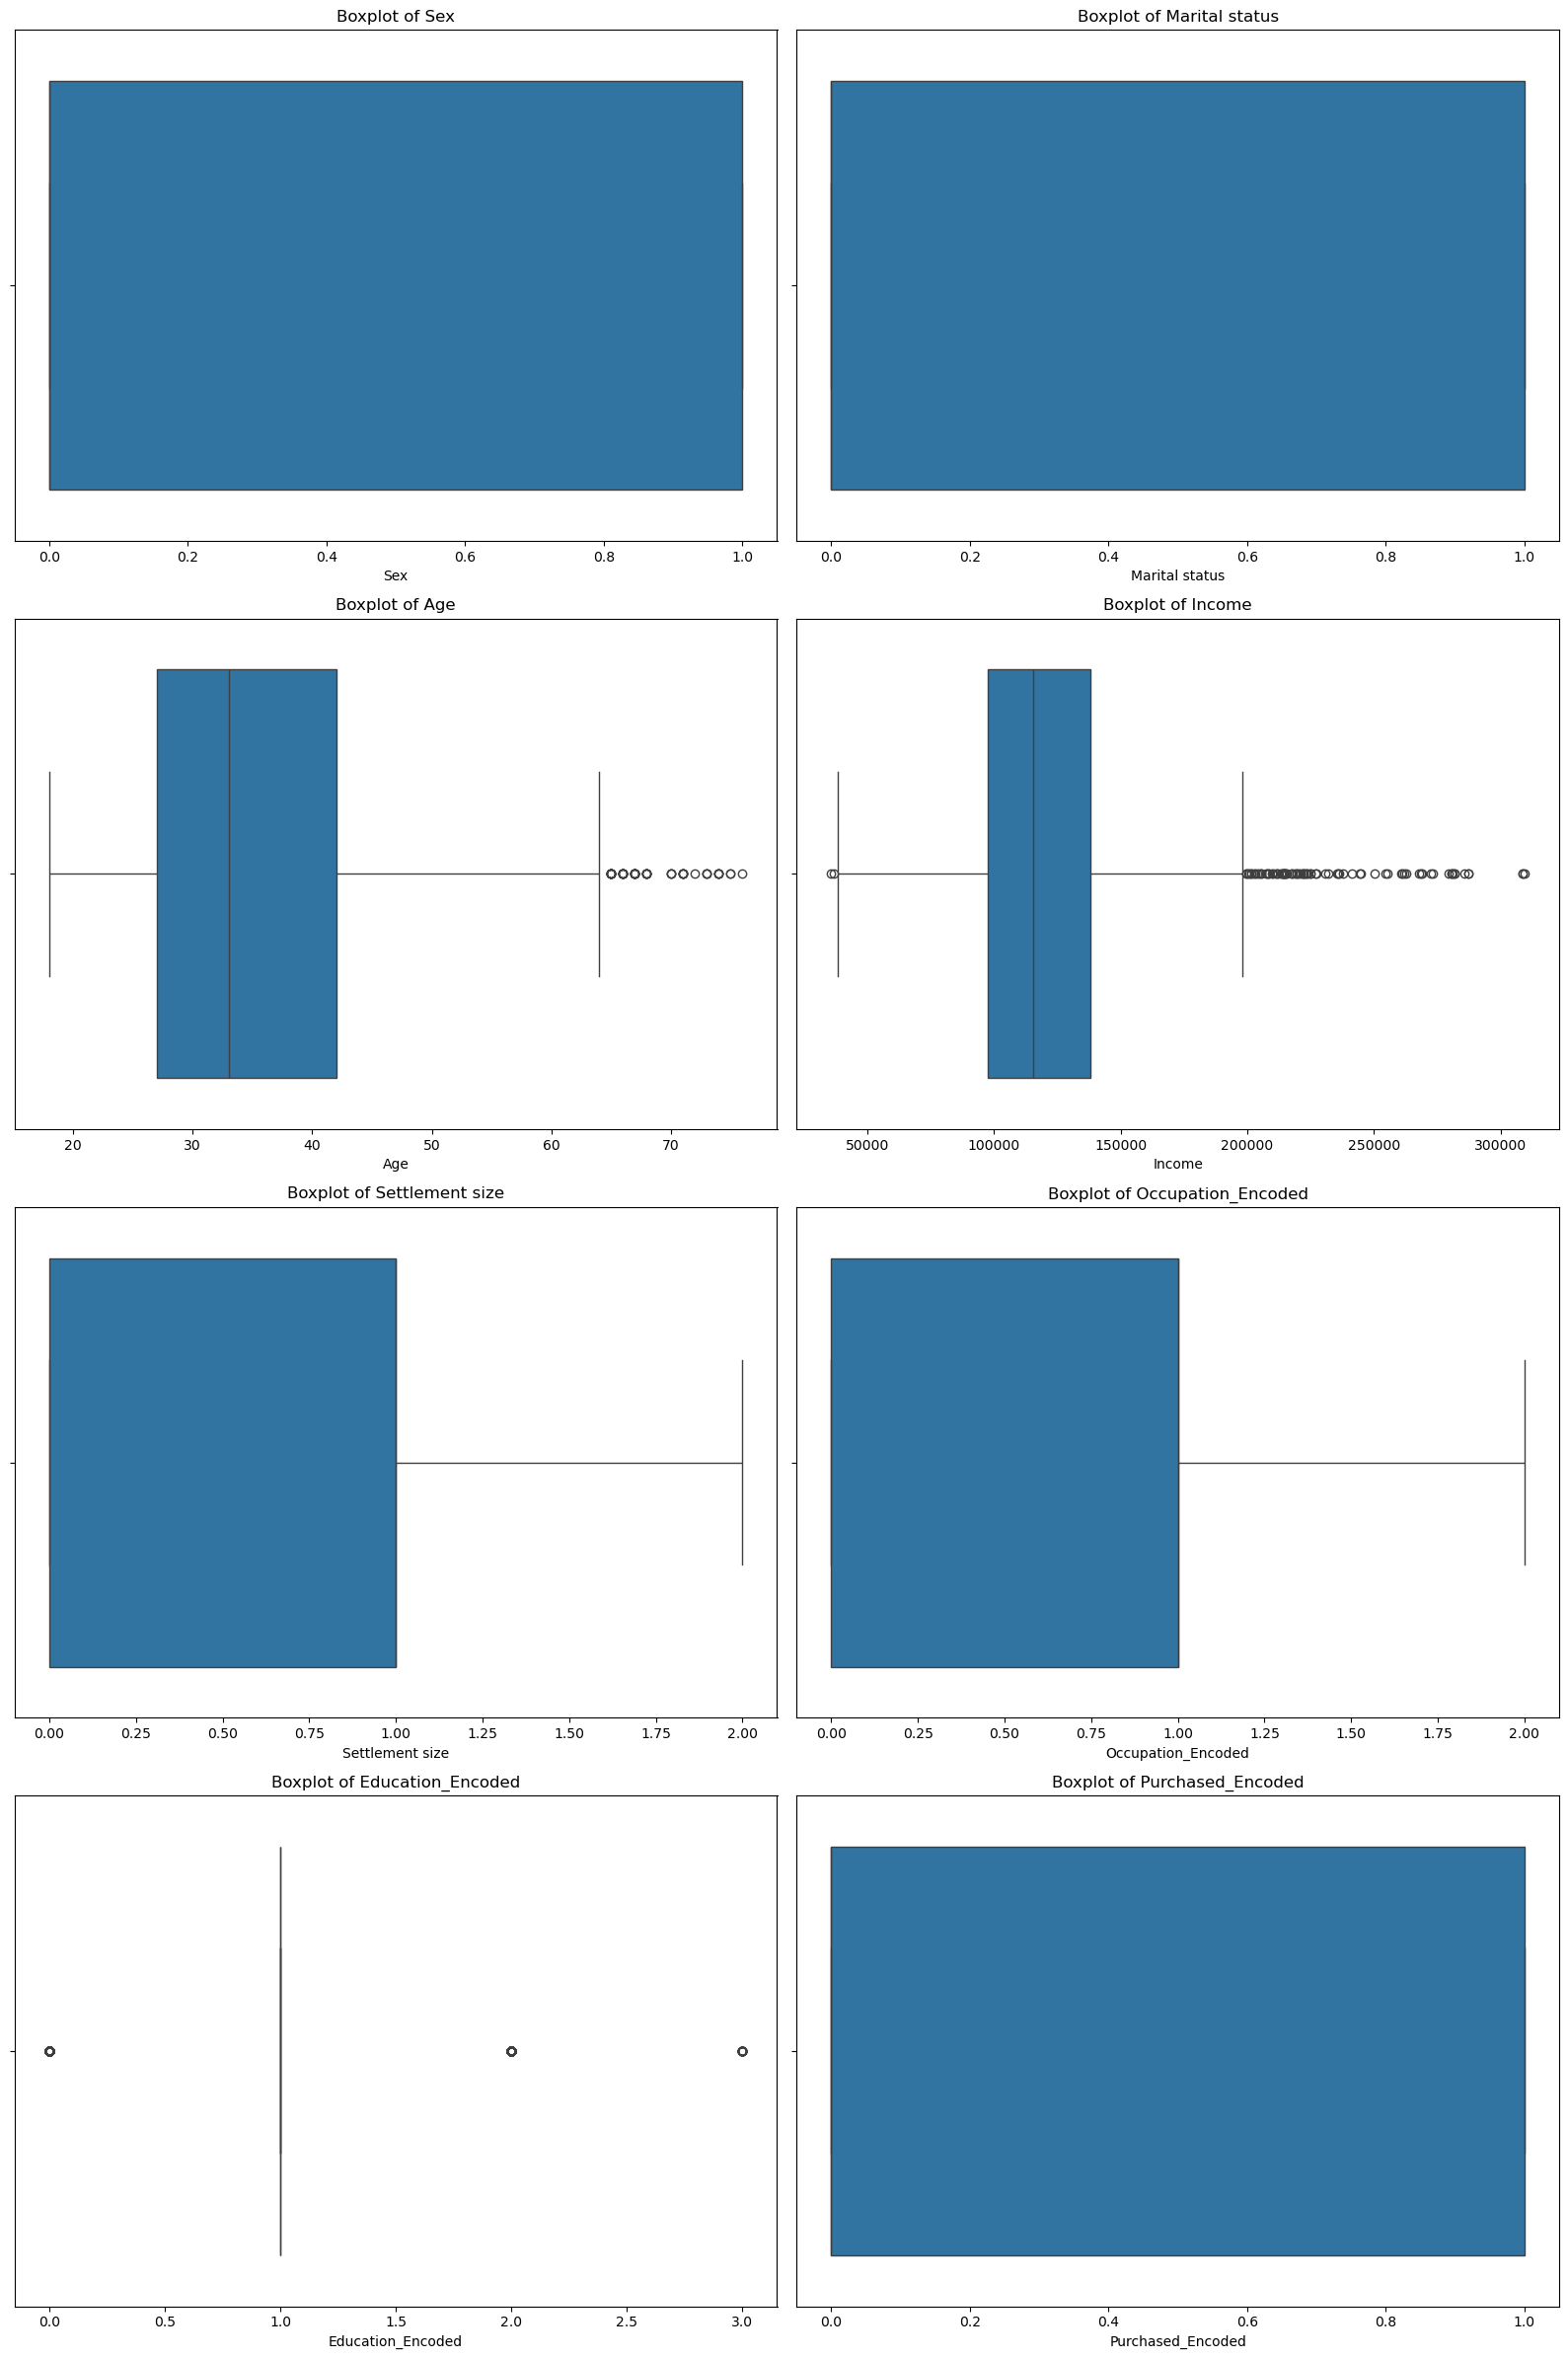

In [14]:
# Outliers analysis

# Calculate the number of rows and columns for subplots

# We can directly select numeric columns if you prefer
num_cols = df_encoded.select_dtypes(include='number').columns.tolist()

num_plots = len(num_cols)
num_rows = (num_plots + 1) // 2  # Add 1 and use integer division to round up
num_cols_subplot = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols_subplot, figsize=(16, 6*num_rows))

# Plot boxplots for each numeric column separately
for col, ax in zip(num_cols, axes.flat):
    sns.boxplot(data=df_encoded[col], ax=ax, orient='h')
    ax.set_title(f'Boxplot of {col}')

# Adjust layout
plt.tight_layout()
plt.show()

In [20]:
# Check the dataframe to ensure the correct column names
print(df_encoded.columns)

Index(['Sex', 'Marital status', 'Age', 'Income', 'Settlement size',
       'Occupation_Encoded', 'Education_Encoded', 'Purchased_Encoded'],
      dtype='object')


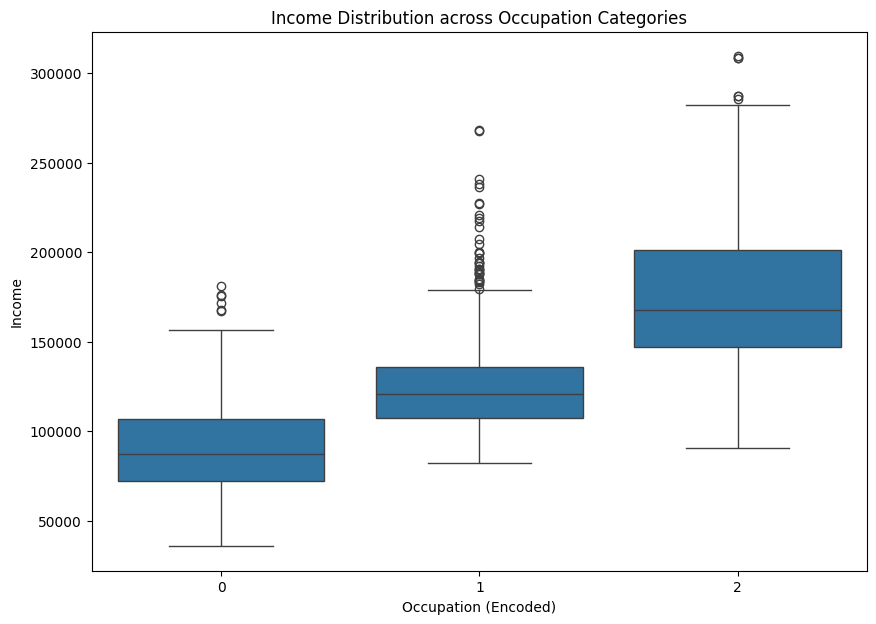

In [21]:
# Visualize the distribution of Income across different Occupation categories
plt.figure(figsize=(10, 7))
sns.boxplot(x='Occupation_Encoded', y='Income', data=df_encoded)
plt.title('Income Distribution across Occupation Categories')
plt.xlabel('Occupation (Encoded)')
plt.ylabel('Income')
plt.show()

In [22]:
df_encoded.corr()

,Sex,Marital status,Age,Income,Settlement size,Occupation_Encoded,Education_Encoded,Purchased_Encoded
Sex,1.000000,0.565576,-0.182861,-0.194094,-0.303353,-0.201489,0.244035,0.223663
Marital status,0.565576,1.000000,-0.215540,-0.073543,-0.099909,-0.030235,0.372684,0.275263
Age,-0.182861,-0.215540,1.000000,0.342697,0.121984,0.110011,0.653779,-0.764626
Income,-0.194094,-0.073543,0.342697,1.000000,0.491011,0.679983,0.236523,-0.250141
Settlement size,-0.303353,-0.099909,0.121984,0.491011,1.000000,0.571605,0.035627,-0.090673
Occupation_Encoded,-0.201489,-0.030235,0.110011,0.679983,0.571605,1.000000,0.066762,-0.073378
Education_Encoded,0.244035,0.372684,0.653779,0.236523,0.035627,0.066762,1.000000,-0.508076
Purchased_Encoded,0.223663,0.275263,-0.764626,-0.250141,-0.090673,-0.073378,-0.508076,1.000000


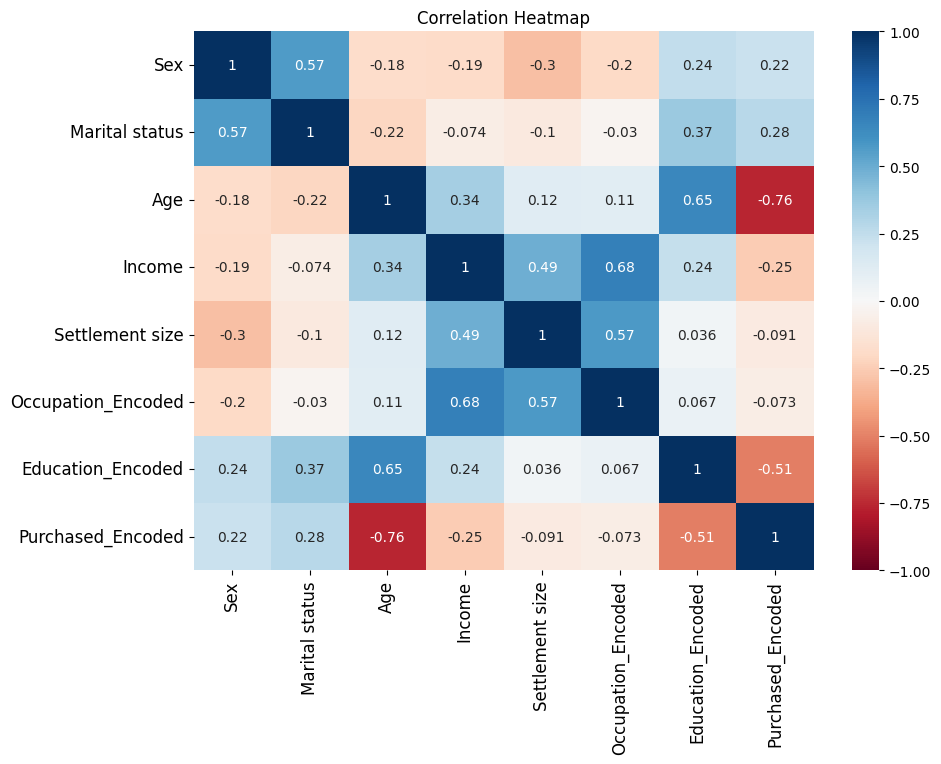

In [23]:
plt.figure(figsize =(10,7))
s = sns.heatmap(df_encoded.corr(), annot = True, cmap = 'RdBu', vmin = -1, vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

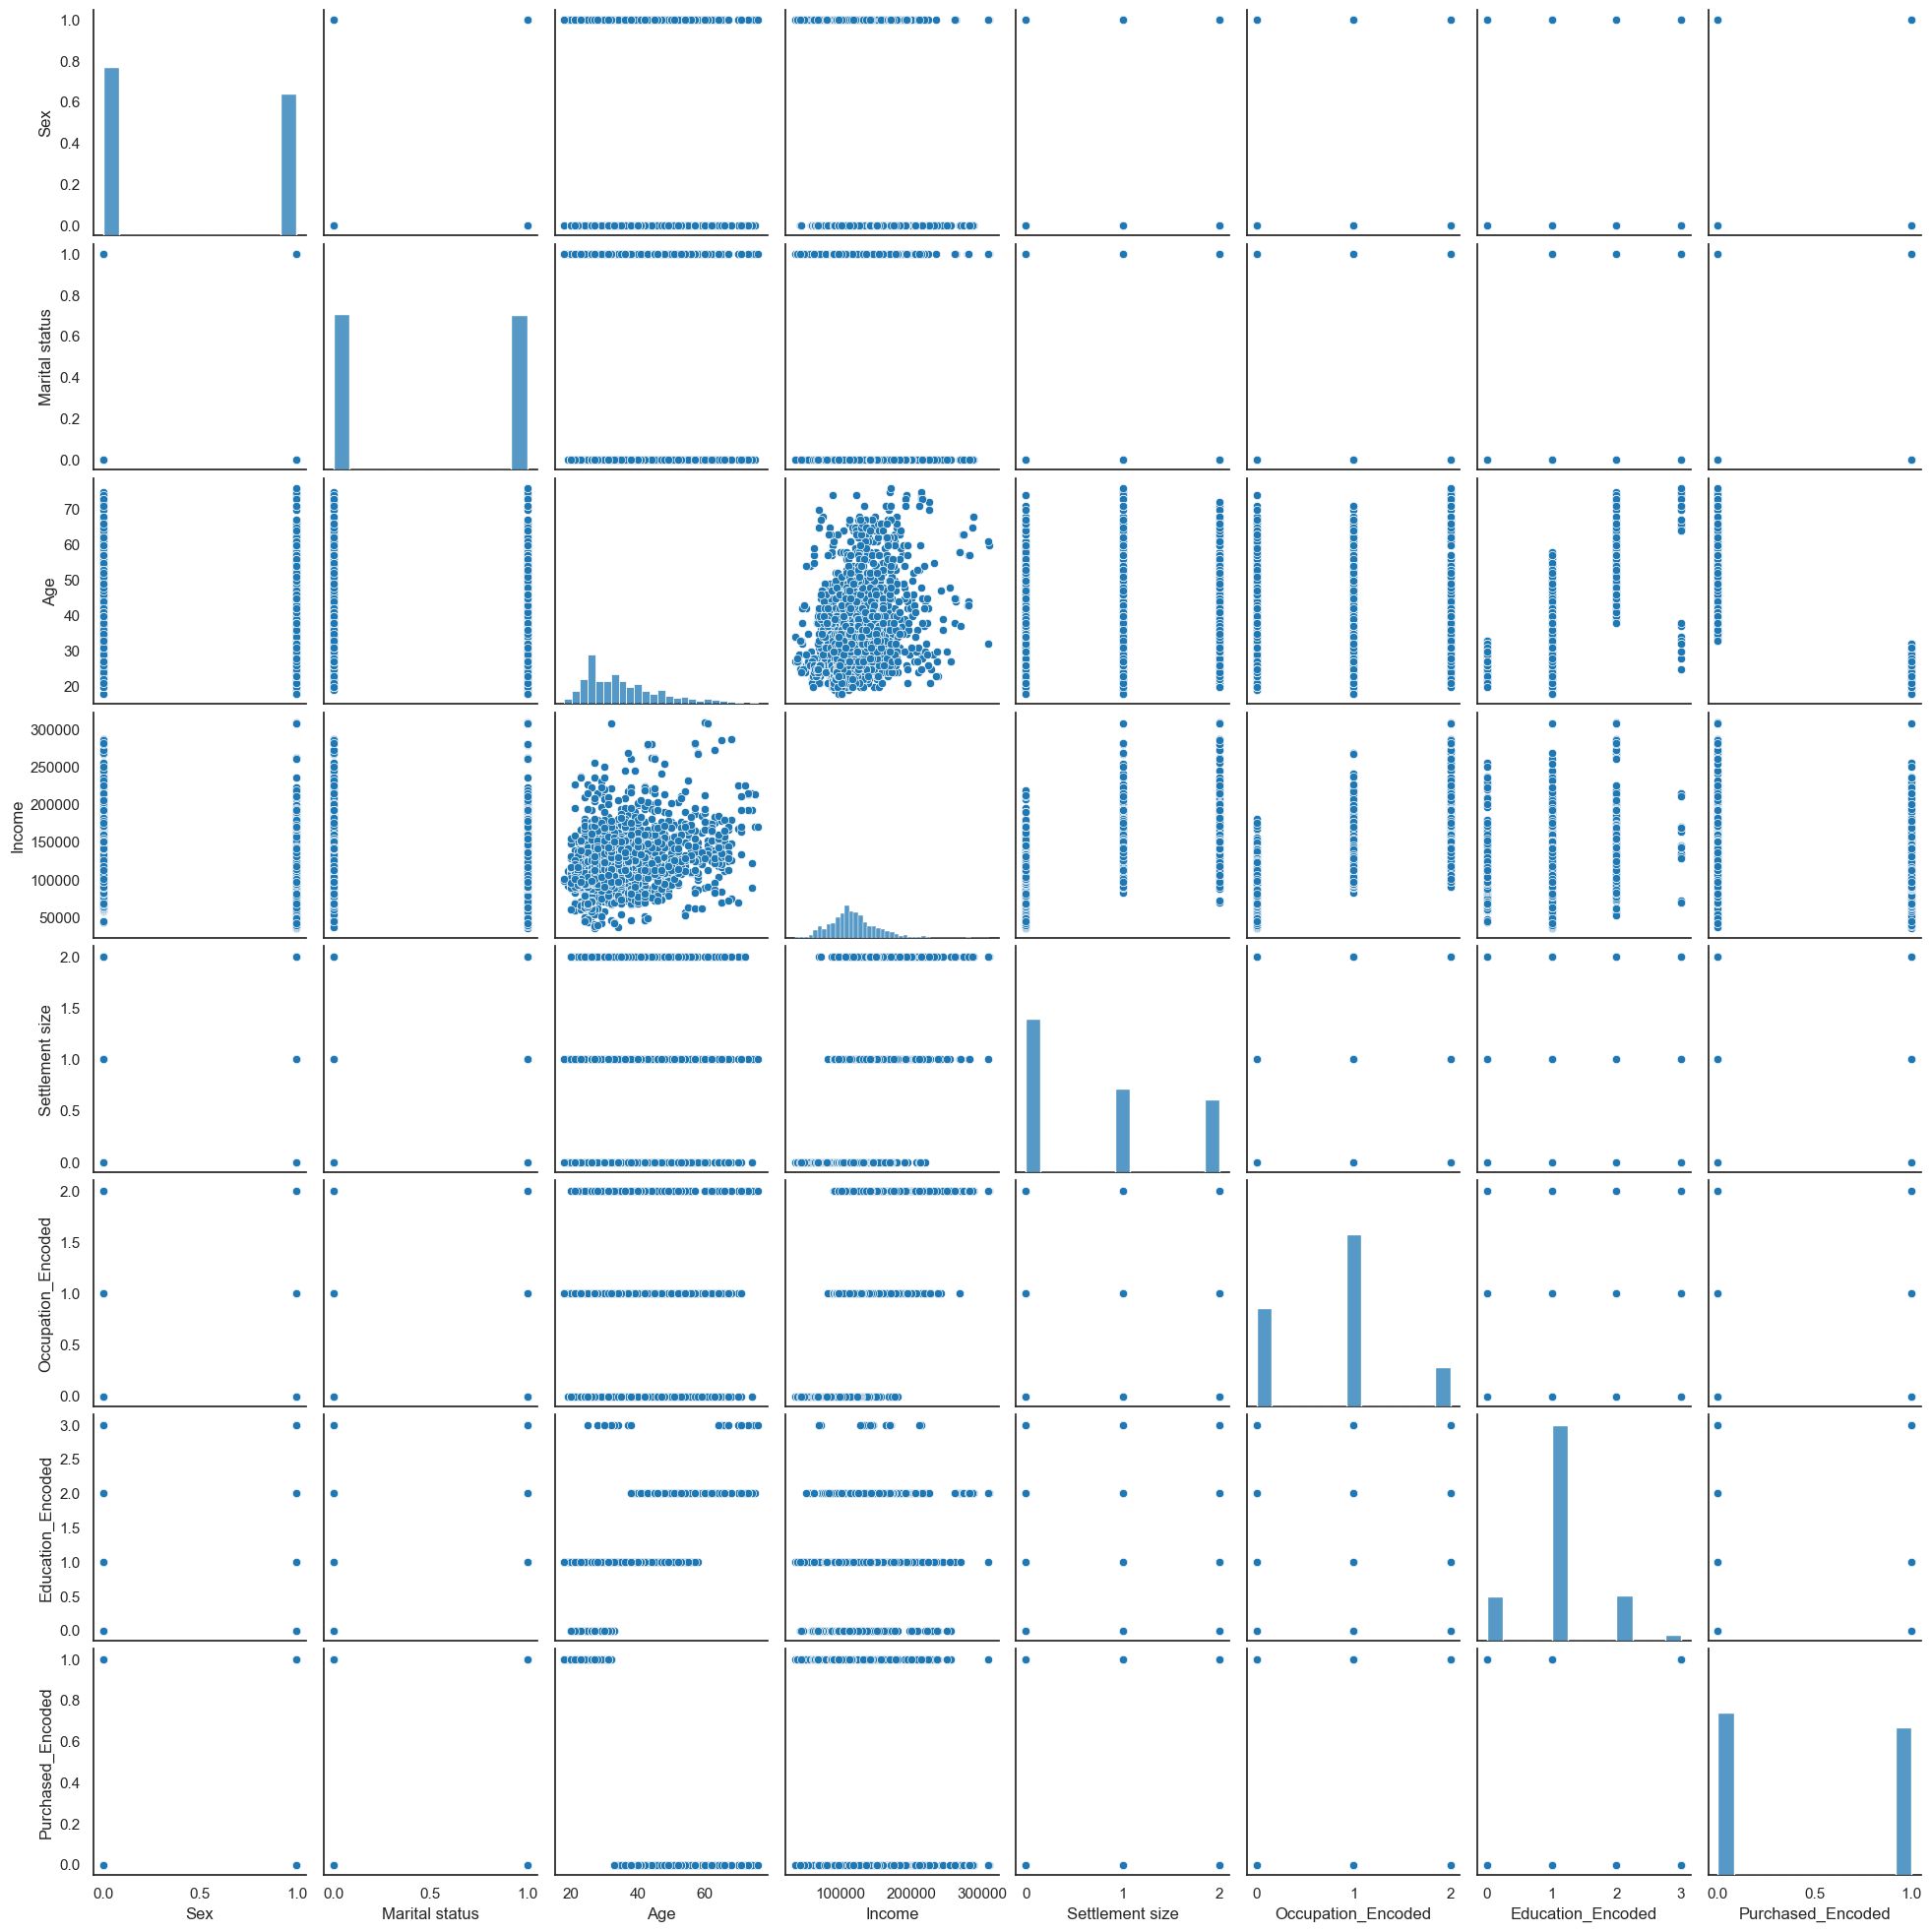

In [65]:
# Pairplot Chart

sns.set_context('notebook')
sns.pairplot(df_encoded);

Text(0.5, 1.0, 'Visualization of raw data')

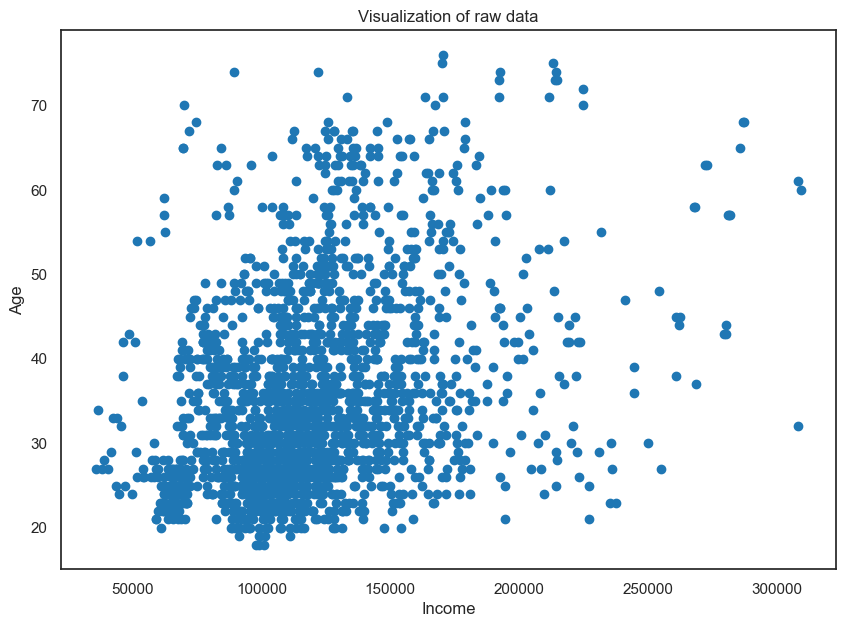

In [64]:
# Visualizing meaningful correlation between variables

plt.figure(figsize =(10,7))
plt.scatter(df_encoded['Income'], df_encoded['Age'])
plt.xlabel('Income')
plt.ylabel('Age')
plt.title('Visualization of raw data')

In [25]:
# Standardization

scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_encoded)

## __HIERARCHICAL CLUSTERING__

In this project, employing hierarchical clustering offers several distinct advantages that can enhance the depth and breadth of this analysis. Unlike K-Means and DBSCAN methods to be employeed next, hierarchical clustering does not require the pre-specification of the number of clusters, allowing for a more natural exploration of the data's structure. This method builds a hierarchy of clusters that can be visualized as a dendrogram. 

## Dendrogram approach

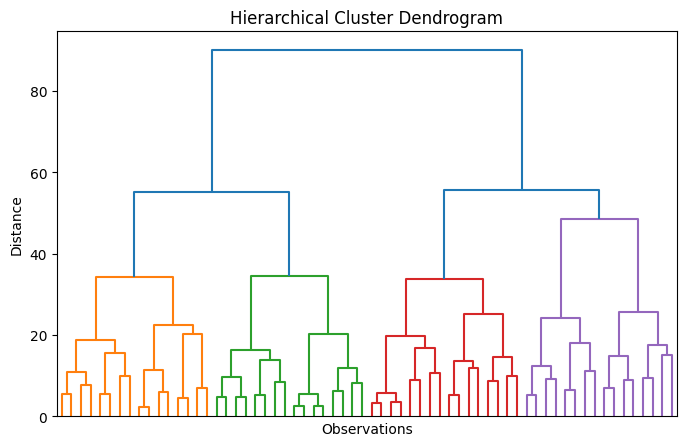

In [26]:
# Dendrogram

hier_clust = linkage(segmentation_std, method = 'ward')

plt.figure(figsize =(8,5))
plt.title('Hierarchical Cluster Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level',
           p = 5,
           show_leaf_counts = False,
           no_labels = True,
           color_threshold = 50)
plt.show()

#### Usually in practice, we employ flat clustering techniques rather than hierarchical they´re way faster, but if we have no prior knowledge about the number of clusters, we can start by performing hierarchical clustering to determine them.

## __FLAT CLUSTERING APPROACHES (K MEANS)__

## __K Means Clustering Approach #1__

The wcss is the sum of the variance between the observations in each cluster and it measures the distance between each observation and the centroid and calculates the squared difference between the two. Hence the name within cluster sum squares.
 
I will use within cluster sum of squares values to determine the best clustering solution.

I'm going to set the number of clusters to i and initialize the K-means++ algorithm that runs before the actual K-means and finds the best starting points for the centroids.
 

In [27]:
# Sum of Squares Values

wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)      
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

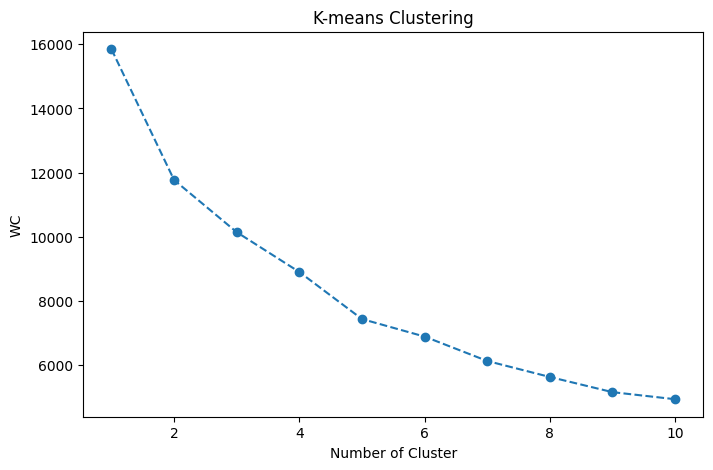

In [28]:
# Elbow plot

plt.figure(figsize = (8,5))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Cluster')
plt.ylabel('WC')
plt.title('K-means Clustering')
plt.show()

#### The only  place in the graph where there is a steeply declining and smoothening after that is in cluster number 4

### Perform K Means with 4 Cluster

In [29]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

kmeans.fit(segmentation_std)

KMeans(n_clusters=4, random_state=42)

## Results for K Means Approach #1

Assign the labels generated by the K-means clustering algorithm to a new column called 'Segment K-means' in the DataFrame `df_segm_kmeans`.:

1. `df_segm_kmeans['Segment K-means']` - This selects the column 'Segment K-means' in the DataFrame `df_segm_kmeans`.

2. `=` - This assigns a new value to the selected column.

3. `kmeans.labels_` - This accesses the labels generated by the K-means clustering algorithm. The `kmeans` object is assumed to be previously defined and fitted to the data. It will contain the predicted clusters for each observation in the dataset

In [32]:
df_segments_kmeans = df_encoded.copy()
df_segments_kmeans['Segment K-means'] = kmeans.labels_

#### The code below code calculates the mean of each column in the DataFrame `df_segments_kmeans` grouped by the values in the 'Segment K-means' column.

In [34]:
df_segments_analysis = df_segments_kmeans.groupby(['Segment K-means']).mean()
df_segments_analysis

,Sex,Marital status,Age,Income,Settlement size,Occupation_Encoded,Education_Encoded,Purchased_Encoded
Segment K-means,,,,,,,,
0,0.766393,0.954918,26.758197,120547.159836,0.846311,1.069672,1.024590,0.940574
1,0.170358,0.304940,47.120954,152114.131175,1.340716,1.267462,1.413969,0.017036
2,0.873913,0.743478,35.245652,94016.115217,0.026087,0.173913,1.213043,0.421739
3,0.069507,0.000000,31.775785,108180.526906,0.565022,0.587444,0.383408,0.627803


The code below assigns labels to the clusters in the DataFrame, I will name them as follows:

- 0 is mapped to 'Professionally-minded'
- 1 is mapped to 'Wealthy'
- 2 is mapped to 'Disadvantaged'
- 3 is mapped to 'Averages'

In [145]:
df_segments_analysis['N Obs'] = df_segments_kmeans[['Segment K-means','Sex']].groupby(['Segment K-means']).count()

df_segments_analysis['Prop Obs'] = df_segments_analysis['N Obs']/df_segments_analysis['N Obs'].sum()

df_segments_analysis

df_segments_analysis.rename({0:'Professionally-minded',
                             1:'Wealthy',
                             2:'Disadvantaged',
                             3:'Averages'})

,Sex,Marital status,Age,Income,Settlement size,Occupation_Encoded,Education_Encoded,Purchased_Encoded,N Obs,Prop Obs
Segment K-means,,,,,,,,,,
Professionally-minded,0.766393,0.954918,26.758197,120547.159836,0.846311,1.069672,1.024590,0.940574,488,0.246340
Wealthy,0.170358,0.304940,47.120954,152114.131175,1.340716,1.267462,1.413969,0.017036,587,0.296315
Disadvantaged,0.873913,0.743478,35.245652,94016.115217,0.026087,0.173913,1.213043,0.421739,460,0.232206
Averages,0.069507,0.000000,31.775785,108180.526906,0.565022,0.587444,0.383408,0.627803,446,0.225139


## Visualizing Clusters from K Means Model Aproach #1

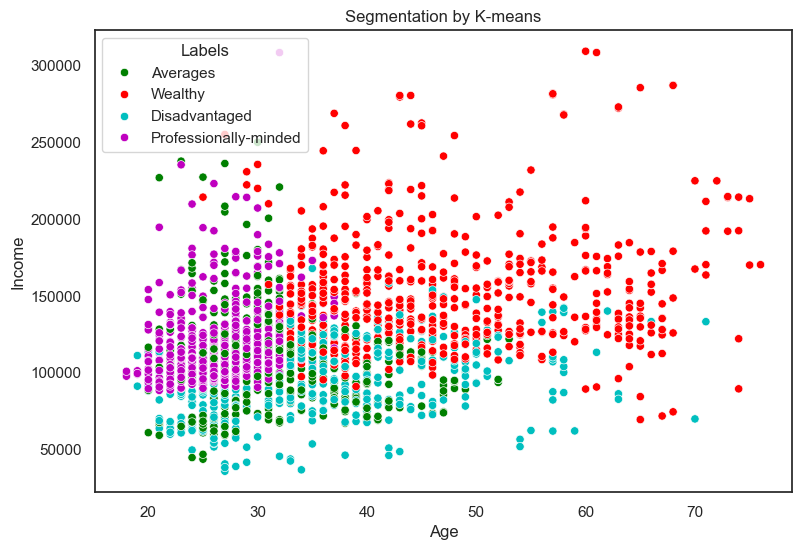

In [147]:
# Visualizing the Clusters

df_segments_kmeans['Labels'] = df_segments_kmeans['Segment K-means'].map({0:'Professionally-minded',
                                                                          1:'Wealthy',
                                                                          2:'Disadvantaged',
                                                                          3:'Averages'})

x_axis = df_segments_kmeans['Age']
y_axis = df_segments_kmeans['Income']
plt.figure(figsize = (9,6))
sns.scatterplot(data=df_segments_kmeans, x=x_axis, y=y_axis, hue = df_segments_kmeans['Labels'],  palette = ['g','r','c','m'])
plt.title('Segmentation by K-means')
plt.show()

### According to the visual above, it seem difficult to differentiate clusters for Averages and Disadvantages, because of this, this approach must be tune in order to get a better result.

## __K Means Clustering Approach #2__

## Principal Components Analysis for K Means Clustering

### PCA will creates as many components as there are features in our data, in our case will create 7

In [232]:
pca = PCA()

pca.fit(segmentation_std)

PCA()

In [39]:
pca.explained_variance_ratio_

array([0.35275281, 0.24416653, 0.20141256, 0.06614341, 0.05084721,
       0.03689704, 0.03035158, 0.01742887])

### A line chart will show the cumulative explained variance against the number of component chosen

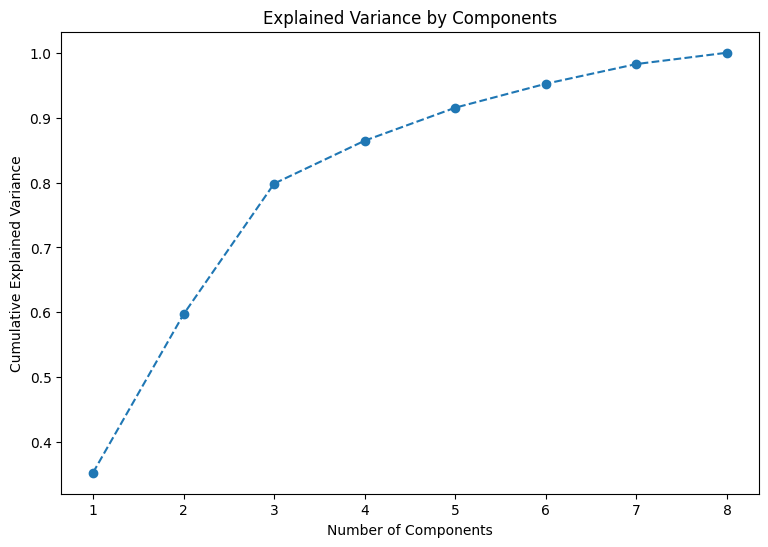

In [41]:
# Ensure pca.explained_variance_ratio_ has the correct number of components
num_components = len(pca.explained_variance_ratio_)

plt.figure(figsize=(9,6))
plt.plot(range(1, num_components + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

### The rule of thumb: Keep 80% of the variance, so keep 3 component make sense

In [42]:
pca = PCA(n_components = 3)

pca.fit(segmentation_std)

## PCA Results

In [44]:
pca.components_

array([[-0.25825372, -0.18134778,  0.4531981 ,  0.43986028,  0.34039652,
         0.35725621,  0.28503276, -0.42048419],
       [ 0.40823279,  0.3551132 ,  0.33794667, -0.13361547, -0.31174905,
        -0.27921203,  0.56364933, -0.28693583],
       [ 0.36726629,  0.55141234, -0.23606368,  0.32379749,  0.29974588,
         0.42664447,  0.14825907,  0.32655042]])

#### The values themselves show the so called loadings
#### Loadings are correlations between an original variable and component

In [45]:
df_pca_components = pd.DataFrame(data = pca.components_,
                           columns = df_encoded.columns.values,
                           index = ['Component 1','Component 2','Component 3'])
df_pca_components

,Sex,Marital status,Age,Income,Settlement size,Occupation_Encoded,Education_Encoded,Purchased_Encoded
Component 1,-0.258254,-0.181348,0.453198,0.439860,0.340397,0.357256,0.285033,-0.420484
Component 2,0.408233,0.355113,0.337947,-0.133615,-0.311749,-0.279212,0.563649,-0.286936
Component 3,0.367266,0.551412,-0.236064,0.323797,0.299746,0.426644,0.148259,0.326550


### In the heatmap we'll the red blue color scheme, and retain the correlation coefficients  with anot equals true

([<matplotlib.axis.YTick at 0x267b746b150>,
 [Text(0, 0, 'Component 1'),
  Text(0, 1, 'Component 2'),
  Text(0, 2, 'Component 3')])

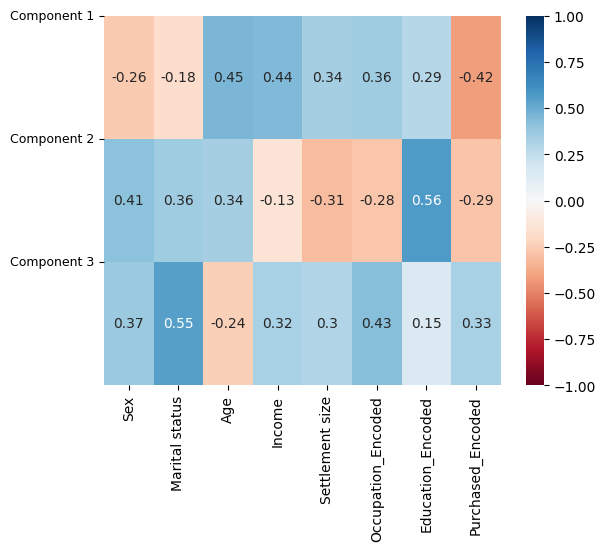

In [46]:
sns.heatmap(df_pca_components,
            vmin = -1,
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0,1,2],
           ['Component 1','Component 2','Component 3'],
           rotation = 360,
           fontsize = 9)

### How is our data related to these new features?

####  Our original data refers to the original seven features, therefore it is seven dimensional.
####  It must be transformed it into three dimensional
####  The PCA class has a built-in method that transforms our data in the desired way.
####  Then the result is a new array where each observation is described by the three components.
####  That's why there will be only three columns, one for each of the new features.
####  These new values we obtained are called PCA scores.

In [47]:
pca.transform(segmentation_std)

array([[ 0.17904531,  0.63474473, -2.55544573],
       [ 0.27786974,  0.03585054, -1.80131207],
       [ 1.47533258,  2.41405689, -0.91818594],
       ...,
       [-0.85962312,  1.16520949, -1.66593876],
       [-0.74523875, -2.41734661, -0.47237538],
       [-1.48401142, -0.00806731,  1.56426246]])

In [48]:
Scores_pca = pca.transform(segmentation_std)

## Fitting K Means Clustering Tuned with PCA

In [49]:
wcss = []
for i in range (1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)      
    kmeans_pca.fit(Scores_pca)
    wcss.append(kmeans_pca.inertia_)

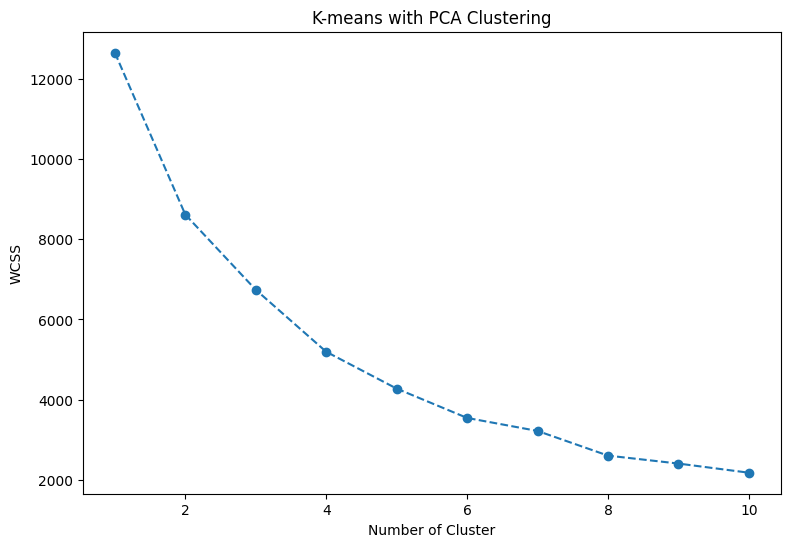

In [50]:
plt.figure(figsize = (9,6))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [51]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state=42)

In [52]:
kmeans_pca.fit(Scores_pca)

KMeans(n_clusters=4, random_state=42)

## Insights for K Means Clustering Tuned with PCA

### We'll add the values of the separate components to our segmentation dataset

#### 1st line This line concatenates the `df_segmentation` DataFrame (with the index reset) and a DataFrame pd.DataFrame(Scores_pca) horizontally along the columns axis. The result is assigned to a new DataFrame df_segm_pca_kmeans
####  2nd line assigns new column names to the last three columns of the df_segm_pca_kmeans DataFrame. The new column names are 'Component 1', 'Component 2', and 'Component 3'
####  3rd line adds a new column named 'Segment K-means PCA' to the df_segm_pca_kmeans DataFrame and assigns the values from the kmeans_pca.labels_ attribute to this column. The kmeans_pca.labels_ attribute contains the cluster labels assigned by the K-means clustering algorithm.

In [53]:
df_segment_pca_kmeans = pd.concat([df_encoded.reset_index(drop = True), pd.DataFrame(Scores_pca)], axis =1)
df_segment_pca_kmeans.columns.values[-3:] = ['Component 1', 'Component 2', 'Component 3']
df_segment_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [54]:
df_segment_pca_kmeans

,Sex,Marital status,Age,Income,Settlement size,Occupation_Encoded,Education_Encoded,Purchased_Encoded,Component 1,Component 2,Component 3,Segment K-means PCA
0,0.0,0.0,49.0,89210.0,0.0,0,1,0,0.179045,0.634745,-2.555446,2
1,0.0,0.0,35.0,144848.0,0.0,0,1,0,0.277870,0.035851,-1.801312,2
2,0.0,1.0,61.0,151591.0,0.0,0,2,0,1.475333,2.414057,-0.918186,2
3,0.0,0.0,60.0,89374.0,0.0,0,2,0,1.082641,1.892655,-2.528417,2
4,1.0,1.0,32.0,88428.0,0.0,0,1,1,-2.211170,1.101731,0.274621,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1976,1.0,1.0,36.0,135896.0,1.0,2,1,0,0.868195,0.369126,1.645273,3
1977,1.0,0.0,28.0,141453.0,1.0,2,1,1,0.143215,-1.166060,1.404759,1
1978,1.0,0.0,38.0,81014.0,0.0,0,1,0,-0.859623,1.165209,-1.665939,2
1979,0.0,0.0,27.0,112470.0,1.0,1,0,1,-0.745239,-2.417347,-0.472375,0


### To get Insights, we'll calculate the mean values of each features by clusters.

In [55]:
df_segment_pca_kmeans_freq = df_segment_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segment_pca_kmeans_freq

,Sex,Marital status,Age,Income,Settlement size,Occupation_Encoded,Education_Encoded,Purchased_Encoded,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,,
0,0.108014,0.000000,27.445993,114290.324042,0.822300,0.766551,0.027875,0.989547,-0.945734,-2.120040,-0.607484
1,0.803468,0.930636,26.657514,108818.284682,0.579480,0.752890,1.008671,0.930636,-1.330409,0.162936,1.006545
2,0.502155,0.379310,43.709052,103491.573276,0.090517,0.310345,1.331897,0.000000,0.109967,1.254968,-1.216657
3,0.161710,0.310409,45.535316,155186.377323,1.459108,1.343866,1.366171,0.027881,2.120899,-0.160976,0.078714


In [148]:
# Calculates the frequency and proportion of observations for each segment in a dataset and renames the segments

df_segment_pca_kmeans_freq['N Obs'] = df_segment_pca_kmeans[['Segment K-means PCA','Sex']].groupby(['Segment K-means PCA']).count()
df_segment_pca_kmeans_freq['Prop Obs'] = df_segment_pca_kmeans_freq['N Obs']/df_segment_pca_kmeans_freq['N Obs'].sum()
df_segment_pca_kmeans_freq = df_segment_pca_kmeans_freq.rename({0:'Professionally-minded',
                                                                1:'Wealthy',
                                                                2:'Disadvantaged',
                                                                3:'Averages'})

df_segment_pca_kmeans_freq


,Sex,Marital status,Age,Income,Settlement size,Occupation_Encoded,Education_Encoded,Purchased_Encoded,Component 1,Component 2,Component 3,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,,
Disadvantaged,0.108014,0.000000,27.445993,114290.324042,0.822300,0.766551,0.027875,0.989547,-0.945734,-2.120040,-0.607484,NaN,NaN
Averages,0.803468,0.930636,26.657514,108818.284682,0.579480,0.752890,1.008671,0.930636,-1.330409,0.162936,1.006545,NaN,NaN
Professionally-minded,0.502155,0.379310,43.709052,103491.573276,0.090517,0.310345,1.331897,0.000000,0.109967,1.254968,-1.216657,NaN,NaN
Wealthy,0.161710,0.310409,45.535316,155186.377323,1.459108,1.343866,1.366171,0.027881,2.120899,-0.160976,0.078714,NaN,NaN


## Visualizing Clusters from K Means Model Aproach #2

###  Let's visualize the segments from K Means Tuned with PCA with respect to the first two components

### Before that, we should add the names of the segments to the labels

In [149]:
df_segment_pca_kmeans['Legend'] = df_segment_pca_kmeans['Segment K-means PCA'].map({0:'Professionally-minded',
                                                                                    1:'Wealthy',
                                                                                    2:'Disadvantaged',
                                                                                    3:'Averages'})

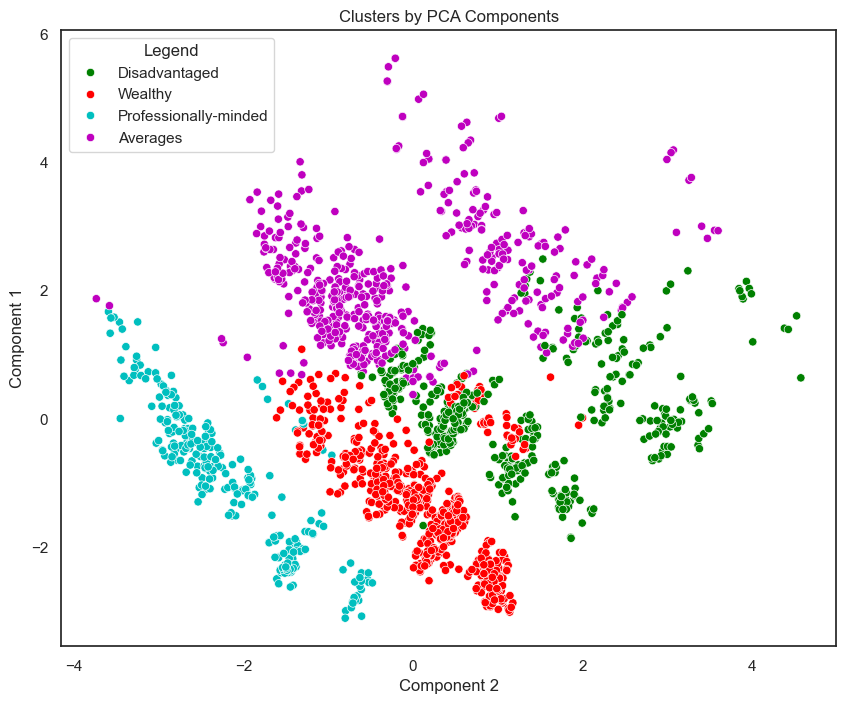

In [150]:
x_axis = df_segment_pca_kmeans['Component 2']
y_axis = df_segment_pca_kmeans['Component 1']
plt.figure(figsize = (10,8))
sns.scatterplot(data=df_segment_pca_kmeans, x=x_axis, y=y_axis, hue = df_segment_pca_kmeans['Legend'],  palette = ['g','r','c','m'])
plt.title('Clusters by PCA Components')
plt.show()

### K Means Clustering with PCA has provided a clearer and more concise clusters, with easily interpretable segments.

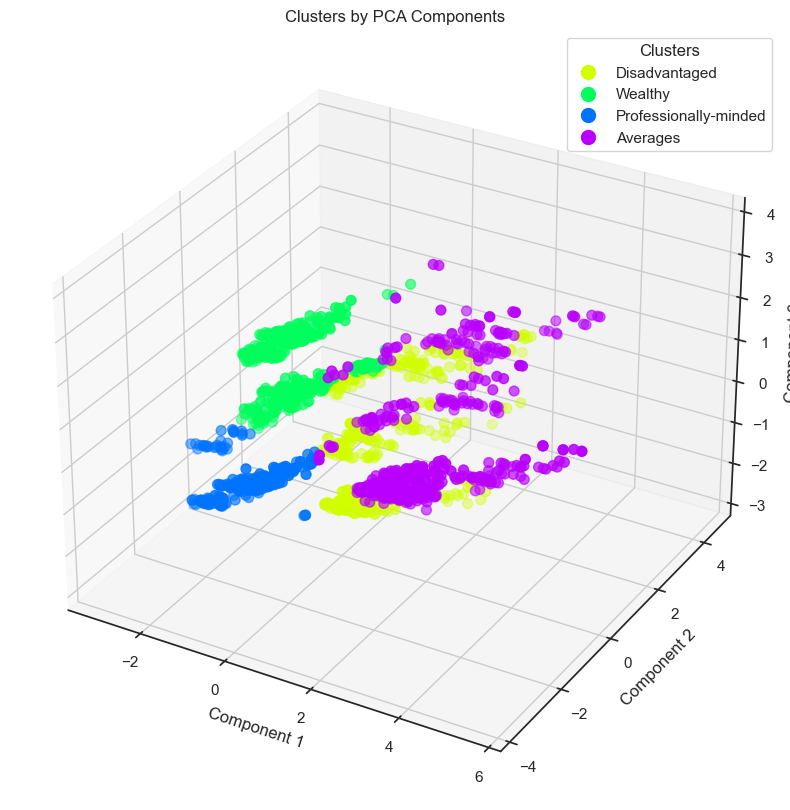

In [151]:
from mpl_toolkits.mplot3d import Axes3D

# Dynamically create color mapping based on unique cluster labels
unique_clusters = df_segment_pca_kmeans['Legend'].unique()
color_palette = sns.color_palette("hsv", len(unique_clusters))
cluster_color_mapping = dict(zip(unique_clusters, color_palette))
    
# Create 3D scatter plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Define axis data
x_axis = df_segment_pca_kmeans['Component 1']
y_axis = df_segment_pca_kmeans['Component 2']
z_axis = df_segment_pca_kmeans['Component 3']

# Scatter plot
scatter = ax.scatter(
    x_axis, y_axis, z_axis, 
    c=df_segment_pca_kmeans['Legend'].map(cluster_color_mapping),
    s=50)

# Set labels and title
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('Clusters by PCA Components')

# Create legend
handles = [plt.Line2D([0], [0], marker='o', color=color, linestyle='', markersize=10) for color in cluster_color_mapping.values()]
labels = cluster_color_mapping.keys()
ax.legend(handles, labels, title='Clusters')
    
plt.show()

## __FLAT CLUSTERING APPROACHES (DBSCAN)__

## __DBSCAN Approach #1__

In [66]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [67]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

## Parameters Scenarios for DBSCAN approach #1

### Find the optimal parameters with heuristic method based in K nearest neighbors

In [161]:
# Set the value of k (MinPts)
k = 4  # This can be adjusted based on your knowledge of the data

In [164]:
# Compute the k-distances
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)

In [165]:
# Take the k-th nearest neighbor distance
k_distances = distances[:, k-1]

In [166]:
# Sort the k-distances in descending order
k_distances_sorted = np.sort(k_distances)[::-1]

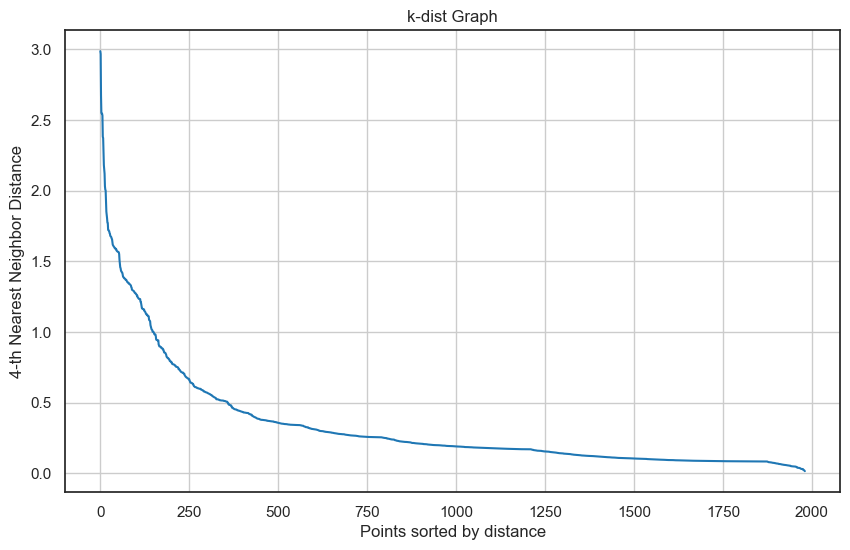

In [167]:
# Plot the k-dist graph
plt.figure(figsize=(10, 6))
plt.plot(k_distances_sorted)
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{k}-th Nearest Neighbor Distance')
plt.title('k-dist Graph')
plt.grid(True)
plt.show()

An optimal suggested according the chart, should be 0.5 of threshhold or below

## Fitting DBSCAN Model Approach #1

In [192]:
# Apply DBSCAN algorithm
dbscan = DBSCAN(eps=0.5, min_samples=60)
dbscan.fit(df_scaled)

DBSCAN(min_samples=60)

In [218]:
# Add the cluster labels to the DataFrame
df_encoded['Cluster'] = dbscan.labels_

## Insights for DBSCAN Model Approach #1

In [219]:
df_segments_DBSCAN = df_encoded.copy()
df_segments_DBSCAN['Segment DBSCAN'] = dbscan.labels_

In [220]:
df_segments_analysis_dbscan = df_segments_DBSCAN.groupby(['Segment DBSCAN']).mean()
df_segments_analysis_dbscan

,Sex,Marital status,Age,Income,Settlement size,Occupation_Encoded,Education_Encoded,Purchased_Encoded,Cluster
Segment DBSCAN,,,,,,,,,
-1,0.33867,0.387931,38.099754,125321.129310,0.844212,0.850369,1.04803,0.360837,-1.0
0,1.00000,1.000000,25.353846,84274.846154,0.000000,0.000000,1.00000,1.000000,0.0
1,1.00000,1.000000,26.529851,111682.037313,0.000000,1.000000,1.00000,1.000000,1.0
2,1.00000,1.000000,25.569892,109368.817204,1.000000,1.000000,1.00000,1.000000,2.0


In [221]:
# Applying lavel to new segments from dbscan

df_segments_analysis_dbscan['N Obs'] = df_segments_DBSCAN[['Segment DBSCAN','Sex']].groupby(['Segment DBSCAN']).count()

df_segments_analysis_dbscan['Prop Obs'] = df_segments_analysis_dbscan['N Obs']/df_segments_analysis_dbscan['N Obs'].sum()

df_segments_analysis_dbscan

df_segments_analysis_dbscan.rename({1:'Professionally-minded',
                                   -1:'Wealthy',
                                    0:'Disadvantaged',
                                    2:'Averages'})

,Sex,Marital status,Age,Income,Settlement size,Occupation_Encoded,Education_Encoded,Purchased_Encoded,Cluster,N Obs,Prop Obs
Segment DBSCAN,,,,,,,,,,,
Wealthy,0.33867,0.387931,38.099754,125321.129310,0.844212,0.850369,1.04803,0.360837,-1.0,1624,0.819788
Disadvantaged,1.00000,1.000000,25.353846,84274.846154,0.000000,0.000000,1.00000,1.000000,0.0,130,0.065623
Professionally-minded,1.00000,1.000000,26.529851,111682.037313,0.000000,1.000000,1.00000,1.000000,1.0,134,0.067643
Averages,1.00000,1.000000,25.569892,109368.817204,1.000000,1.000000,1.00000,1.000000,2.0,93,0.046946


In [222]:
df_segments_DBSCAN['Labels'] = df_segments_DBSCAN['Segment DBSCAN'].map({1:'Professionally-minded',
                                                                        -1:'Wealthy',
                                                                         0:'Disadvantaged',
                                                                         2:'Averages'})

## Visualizing Clusters from DBSCAN Model Aproach #1

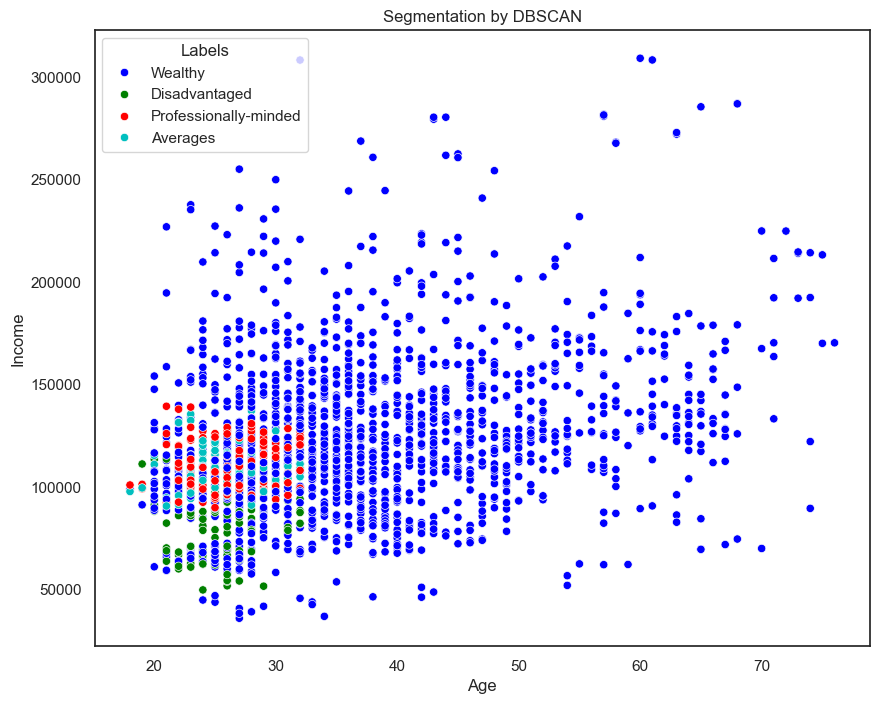

In [231]:
x_axis = df_segments_DBSCAN['Age']
y_axis = df_segments_DBSCAN['Income']
plt.figure(figsize = (10,8))
sns.scatterplot(data=df_segments_DBSCAN, x=x_axis, y=y_axis, hue = df_segments_DBSCAN['Labels'],  palette = ['b','g','r','c','m','p','y'])
plt.title('Segmentation by DBSCAN')
plt.show()

### Alike the first approach for K Means Clustering, it seem difficult to differentiate clusters for Averages and Disadvantages segments in DBSCAN Clustering as well, this approach must be tune in order to get a better result.

## __DBSCAN Approach #2__

## Fitting DBSCAN Model Approach #2

### Principal Components Analysis for DBSCAN Clustering

In [205]:
# Create the DBSCAN model and fitting to standardized data.

dbscan_pca = PCA()

dbscan_pca.fit(df_scaled)

PCA()

## Evaluating Performance for DBSCAN Model Approach #2

DBSCAN does not have an attribute inertia_ because it does not minimize a within-cluster sum of squares as KMeans does. Instead, DBSCAN identifies clusters based on density.

To evaluate the quality of DBSCAN clustering, we can look at metrics like silhouette score, number of clusters, or number of noise points. 

Next is how you can calculate and visualize these metrics for different values of eps and min_samples:

In [208]:
# Fitting DBSCAN to the PCA-reduced data

# Evaluate DBSCAN clustering with different eps and min_samples
eps_values = np.arange(0.1, 1.1, 0.1)
min_samples_values = range(5, 50, 100)
silhouette_scores = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan_pca = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan_pca.fit_predict(Scores_pca)
        if len(set(labels)) > 1:  # More than one cluster
            score = silhouette_score(Scores_pca, labels)
        else:
            score = -1  # Assign -1 if there's only one cluster (or noise)
        silhouette_scores.append((eps, min_samples, score))



In [209]:
# Convert to DataFrame for easier analysis

results_df_dbscan = pd.DataFrame(silhouette_scores, columns=['eps', 'min_samples', 'silhouette_score'])

In [210]:
# Find the best parameters

best_result = results_df_dbscan.loc[results_df_dbscan['silhouette_score'].idxmax()]

print(f"Best eps: {best_result['eps']}")
print(f"Best min_samples: {best_result['min_samples']}")
print(f"Best silhouette score: {best_result['silhouette_score']}")

Best eps: 1.0
Best min_samples: 5.0
Best silhouette score: 0.3312585822375538


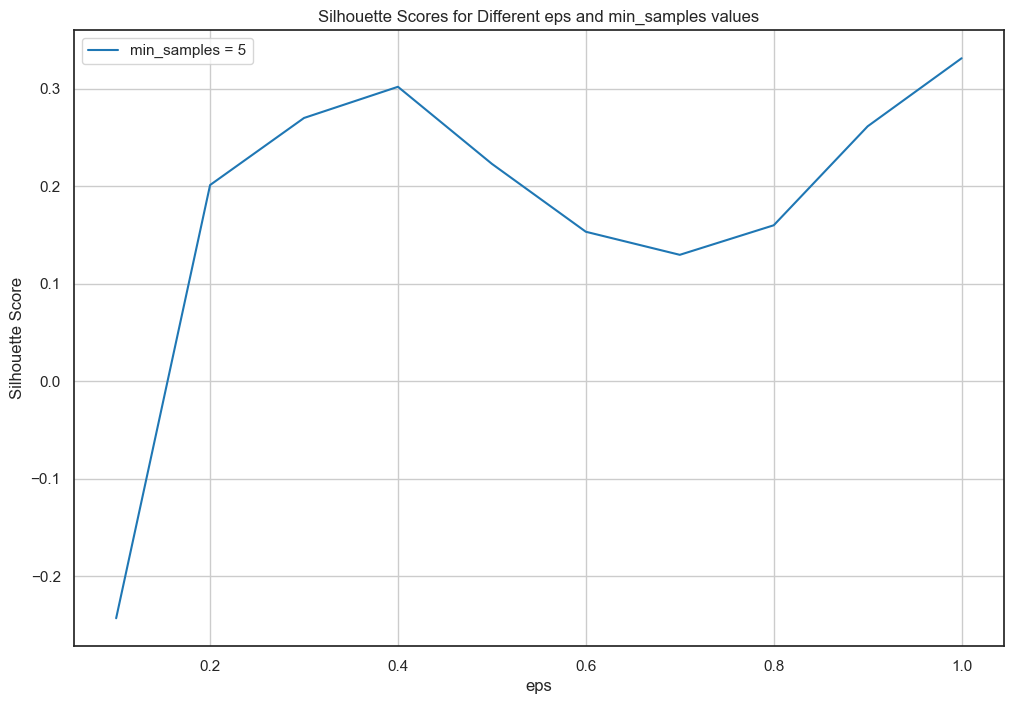

In [212]:
# Plot the results
plt.figure(figsize=(12, 8))
for min_samples in min_samples_values:
    subset = results_df_dbscan[results_df_dbscan['min_samples'] == min_samples]
    plt.plot(subset['eps'], subset['silhouette_score'], label=f'min_samples = {min_samples}')

plt.title('Silhouette Scores for Different eps and min_samples values')
plt.xlabel('eps')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid(True)
plt.show()

## DBSCAN Model Approach #2 Tuned with PCA

In [213]:
# Fit DBSCAN with the best parameters
dbscan_pca = DBSCAN(eps=best_result['eps'], min_samples=int(best_result['min_samples']))
labels = dbscan_pca.fit_predict(Scores_pca)

In [215]:
# Add cluster labels to the original dataframe
df_segments_DBSCAN = df_encoded.copy()
df_segments_DBSCAN['Segment DBSCAN'] = labels

## Insights for DBSCAN Model Approach #2

In [216]:
# Calculate mean values for each segment
df_segments_analysis_dbscan = df_segments_DBSCAN.groupby(['Segment DBSCAN']).mean()
df_segments_analysis_dbscan

,Sex,Marital status,Age,Income,Settlement size,Occupation_Encoded,Education_Encoded,Purchased_Encoded,Cluster
Segment DBSCAN,,,,,,,,,
-1,0.909091,0.818182,39.909091,179039.727273,1.636364,1.181818,2.363636,0.545455,-1.000000
0,0.000000,0.000000,41.287212,129809.591195,0.983229,0.947589,1.000000,0.000000,-1.000000
1,0.748344,0.790287,43.141280,123358.339956,0.593819,0.704194,1.490066,0.002208,-1.000000
2,0.000000,0.000000,63.850000,159320.637500,1.100000,1.087500,2.000000,0.000000,-1.000000
3,0.792035,0.883481,26.095870,107335.646018,0.538348,0.727139,0.954277,1.000000,-0.001475
4,0.000000,0.000000,27.551724,119174.103448,0.938697,0.846743,0.042146,0.988506,-1.000000
5,1.000000,1.000000,68.333333,153349.380952,0.476190,1.095238,3.000000,0.000000,-1.000000


## Visualizing Clusters from DBSCAN Model Aproach #2

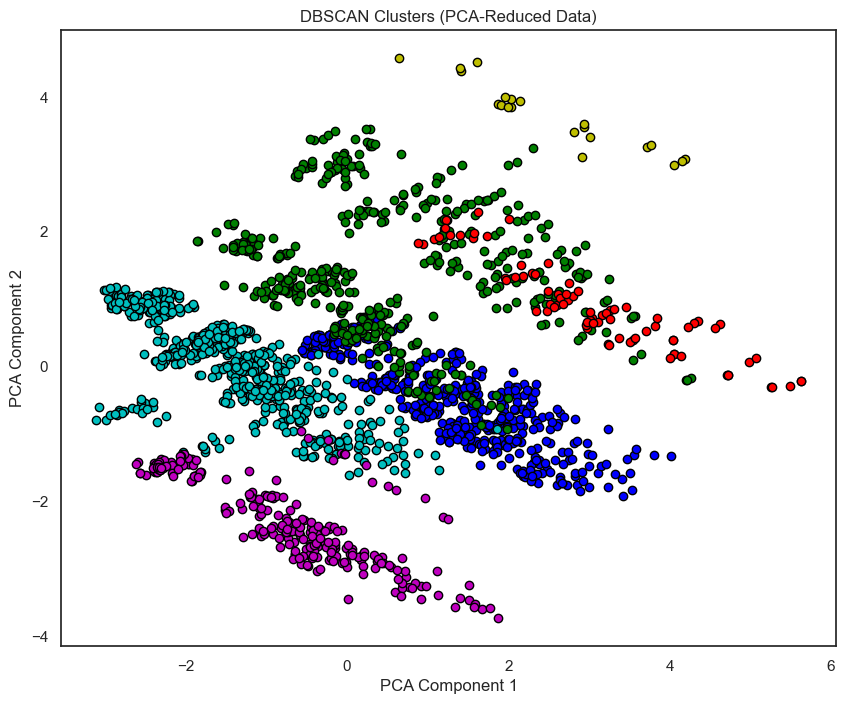

In [230]:
# Assuming labels and Scores_pca are already defined
unique_labels = set(labels)
palette = ['b', 'g', 'r', 'c', 'm', 'y']

plt.figure(figsize=(10, 8))
for k, col in zip(unique_labels, palette):
    if k == -1:
        col = 'k'  # Black used for noise.

    class_member_mask = (labels == k)
    xy = Scores_pca[class_member_mask]

    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clusters (PCA-Reduced Data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(False)  # Eliminate the grid
plt.show()

### DBSCAN Clustering with PCA has provided a clearer but more granular clusters segmentation, even though easily interpretable segments it seems to capturing more subtle patterns.

## DBSCAN Approaches Comparison

### Cluster Characteristics:

Approach #1: Not clear clusters, then hard interpretable segments in particular for Disadvantaged and Standard segments.

Approach #2: More clusters with potentially overlapping or mixed characteristics, making interpretation more complex.

### Data Reduction with PCA:

PCA may have introduced more variance that led to the creation of additional clusters. This is useful for capturing more subtle patterns but can also introduce noise.

### Interpretability:

Approach #1 offers less straightforward and interpretable clusters.

Approach #2 provides a more granular segmentation, which might be beneficial if those additional segments are meaningful and actionable.

### Actionability:

The blurred segmentation in Approach #1 is likely difficult to act upon for marketing or customer relationship strategies.

The additional segments in Approach #2 might provide deeper insights but could complicate the decision-making process.

## __K MEANS vs. DBSCAN APPROACHES COMPARISON AND CONCLUSIONS__

| **Aspect**                          | **K-Means on Standardized Data** | **K-Means on PCA-Reduced Data** | **DBSCAN on Standardized Data** | **DBSCAN on PCA-Reduced Data** |
|-------------------------------------|----------------------------------|---------------------------------|---------------------------------|--------------------------------|
| **Number of Clusters**              | 4                                | 4                               | 4                               | 7                              |
| **Cluster 1**                       | Younger, mid-income              | Younger, mid-income             | Noisy or outliers               | Older, mid-income              |
| **Cluster 2**                       | Older, high-income               | Younger, high purchase behavior | Younger, lower-income           | Older, mid-income (varied)     |
| **Cluster 3**                       | Mid-aged, lower-income           | Older, lower-income             | Mid-aged, higher education      | Older, high-income             |
| **Cluster 4**                       | Mid-aged, mid-income             | Older, high-income              | Mid-aged, mid-income            | Younger, mid-income            |
| **Cluster 5**                       | N/A                              | N/A                             | N/A                             | Younger, mid-income (varied)   |
| **Cluster 6**                       | N/A                              | N/A                             | N/A                             | Older, high-income (high ed)   |

**Characteristics Summary:**

- **K-Means on Standardized Data**:
  - **Cluster 1 (Professionally-minded)**: Younger, mid-income individuals.
  - **Cluster 2 (Wealthy)**: Older, high-income individuals.
  - **Cluster 3 (Disadvantaged)**: Mid-aged, lower-income individuals.
  - **Cluster 4 (Averages)**: Mid-aged, mid-income individuals.

- **K-Means on PCA-Reduced Data**:
  - **Cluster 1 (Professionally-minded)**: Younger, mid-income individuals.
  - **Cluster 2 (Wealthy)**: Younger, high purchase behavior, mid-income individuals.
  - **Cluster 3 (Disadvantaged)**: Older, lower-income individuals.
  - **Cluster 4 (Averages)**: Older, high-income individuals.

- **DBSCAN on Standardized Data**:
  - **Cluster -1 (Wealthy)**: Predominantly noisy or outlier data points.
  - **Cluster 0 (Disadvantaged)**: Younger, lower-income individuals.
  - **Cluster 1 (Professionally-minded)**: Mid-aged, higher education, mid-income individuals.
  - **Cluster 2 (Averages)**: Mid-aged, mid-income individuals.

- **DBSCAN on PCA-Reduced Data**:
  - **Cluster -1**: Multiple groups with varying characteristics.
  - **Cluster 0**: Older, mid-income individuals.
  - **Cluster 1**: Older, mid-income individuals with varying education levels.
  - **Cluster 2**: Older, high-income individuals.
  - **Cluster 3**: Younger, mid-income individuals.
  - **Cluster 4**: Younger, mid-income individuals with varying occupation encoding.
  - **Cluster 5**: Older, high-income individuals with high education levels.


## MAIN INSIGHTS

### Data Reduction with PCA:
K-Means: PCA helped in identifying clear clusters, with slight differences in demographic and income characteristics.
DBSCAN: PCA introduced additional clusters, capturing more subtle patterns and adding complexity.

### Interpretability:
K-Means: Both approaches (with PCA) provided clear and concise clusters with easily interpretable segments.
DBSCAN: The approach on the PCA-reduced data added more complexity with additional clusters.

### Conclusion:
K-Means: Preferred for its clear and actionable clusters, both with PCA treatment.
DBSCAN: Useful for identifying outliers and more granular segmentation, especially when PCA is applied, though it may introduce complexity.

### Actionable Insights and Further Use
These results look suitable for Customer Segmentation, then should be helpful to create targeted marketing strategies and
design personalized offers and promotions for different customer segments.

## __FURTHER ANALYSIS AND REFINEMENT__

A model refinement should be considered to monitor and refine these clustering models.
DBSCAN can uncover additional, often more nuanced segments that K-Means might miss due to its reliance on density rather than distance-based clustering. These additional segments can provide valuable insights and opportunities that are worth exploring.
